## KerasのRecurrentレイヤー

>Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。
>
>以下のドキュメントにまとめられています。
>
>Recurrentレイヤー - Keras Documentation

## 【問題1】各種手法の実行
>Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。
>
>- SimpleRNN
>- GRU
>- LSTM
>- ConvLSTM2D
>
>これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。
>
>Keras公式のサンプルコードを利用してください。
>
>**LSTMのサンプルコード**
>
>keras-apache-mxnet/imdb_lstm.py at master · awslabs/keras-apache-mxnet
>
>**ConvLSTM2Dのサンプルコード**
>
>keras-apache-mxnet/conv_lstm.py at master · awslabs/keras-apache-mxnet
>
>このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [1]:
!pip install --upgrade tensorflow

In [2]:
!pip install --upgrade keras

#### LSTMのサンプルコード

In [ ]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32



In [28]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/ishiitomoaki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/ishiitomoaki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [32]:
print(x_train[0])

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [3]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
print('Train...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,#epochs=15,
              validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/ishiitomoaki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/ishiitomoaki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 322s 408ms/step - loss: 0.5201 - accuracy: 0.7280 - val_loss: 0.3617 - val_accuracy: 0.8429
Epoch 2/5
782/782 [==============================] - 317s 406ms/step - loss: 0.2518 - accuracy: 0.9017 - val_loss: 0.4146 - val_accuracy: 0.8157
Epoch 3/5
782/782 [==============================] - 332s 425ms/step - loss: 0.1609 - accuracy: 0.9412 - val_loss: 0.4692 - val_accuracy: 0.8240
Epoch 4/5
782/782 [==============================] - 367s 469ms/step - loss: 0.0959 - accuracy: 0.9667 - val_loss: 0.5276 - val_accuracy: 0.8208
Epoch 5/5
782/782 [==============================] - 42s 54ms/step - loss: 0.6230 - accuracy: 0.8256
Test score: 0.6230449080467224
Test accuracy: 0.8256000280380249


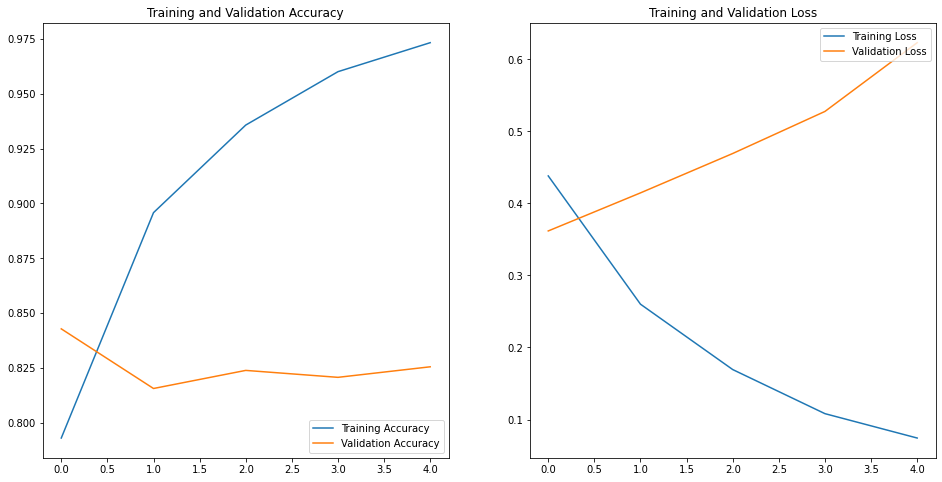

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### SimpleRNN

In [7]:
from keras.layers import SimpleRNN

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# SimpleRNN　に変更
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
print('Train...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,#epochs=15,
              validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
782/782 [==============================] - 163s 205ms/step - loss: 0.7036 - accuracy: 0.5202 - val_loss: 0.6529 - val_accuracy: 0.5952
Epoch 2/5
782/782 [==============================] - 127s 162ms/step - loss: 0.5913 - accuracy: 0.6766 - val_loss: 0.5066 - val_accuracy: 0.7598
Epoch 3/5
782/782 [==============================] - 110s 140ms/step - loss: 0.4562 - accuracy: 0.7965 - val_loss: 0.5371 - val_accuracy: 0.7362
Epoch 4/5
782/782 [==============================] - 93s 119ms/step - loss: 0.4224 - accuracy: 0.8152 - val_loss: 0.4798 - val_accuracy: 0.7932
Epoch 5/5
782/782 [==============================] - 11s 15ms/step - loss: 0.5348 - accuracy: 0.7759
Test score: 0.5347639322280884
Test accuracy: 0.775879979133606


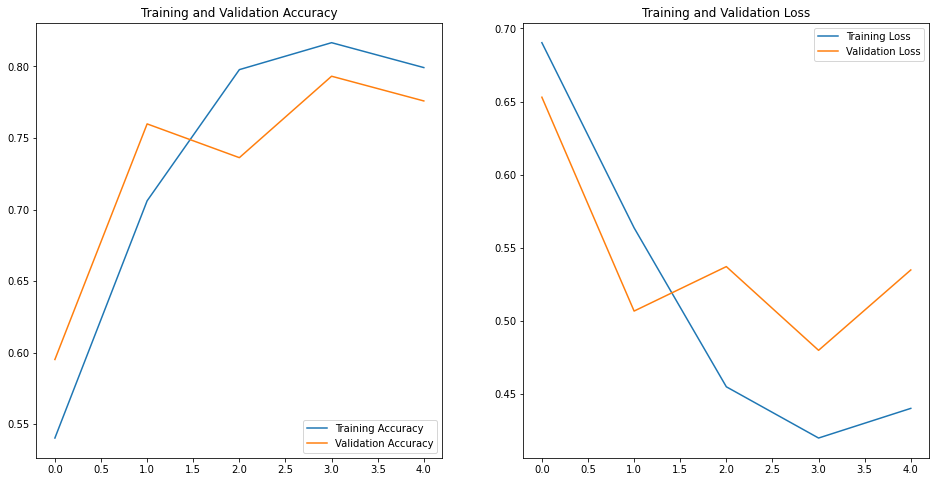

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### GRU

In [9]:
from keras.layers import GRU

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# SimpleRNN　に変更
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
print('Train...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,#epochs=15,
              validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
782/782 [==============================] - 282s 354ms/step - loss: 0.5479 - accuracy: 0.6956 - val_loss: 0.3630 - val_accuracy: 0.8397
Epoch 2/5
782/782 [==============================] - 248s 317ms/step - loss: 0.2499 - accuracy: 0.9016 - val_loss: 0.3509 - val_accuracy: 0.8479
Epoch 3/5
782/782 [==============================] - 269s 343ms/step - loss: 0.1345 - accuracy: 0.9524 - val_loss: 0.4267 - val_accuracy: 0.8298
Epoch 4/5
782/782 [==============================] - 245s 313ms/step - loss: 0.0756 - accuracy: 0.9737 - val_loss: 0.5624 - val_accuracy: 0.8272
Epoch 5/5
782/782 [==============================] - 31s 40ms/step - loss: 0.6247 - accuracy: 0.8207
Test score: 0.6246827840805054
Test accuracy: 0.8206800222396851


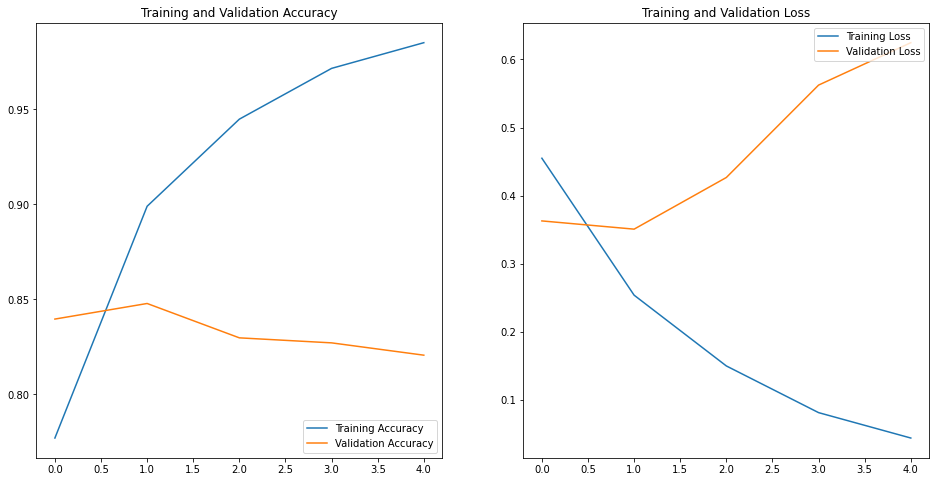

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 精度の比較

- LSTM
    - Test score: 0.37293559312820435
    - Test accuracy: 0.83815997838974
    - グラフの分析：学習データの精度は高かったが、検証データの精度は下がっていない。過学習している。
- SimpleRNN
    - Test score: 0.6487210392951965
    - Test accuracy: 0.6023200154304504
    - グラフの分析：検証データもLossが下がっているため、LSTMに比べて過学習していない。
- GRU
    - Test score: 0.35832804441452026
    - Test accuracy: 0.84579998254776
    - グラフの分析：LSTMと同様に過学習している。
    
テストデータに対しての精度ではLSTMとGRUが高かったが、汎化性能ではSimpleRNNが高い。適切なパラメーターを設定する必要がある。

#### ConvLSTM2Dのサンプルコード

95/95 [==============================] - 2622s 27s/step - loss: 0.7776 - val_loss: 0.7504


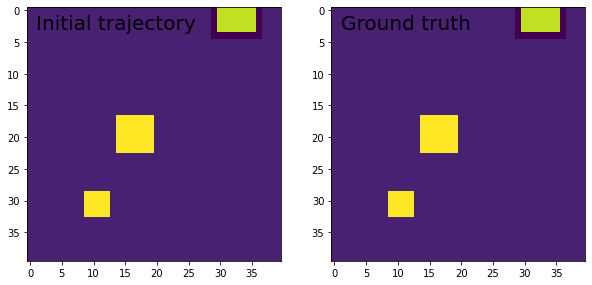

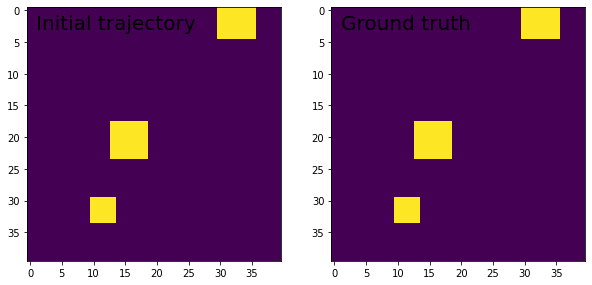

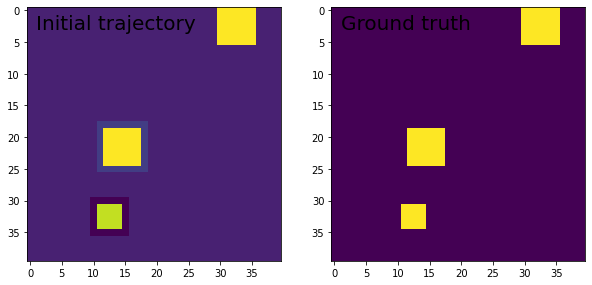

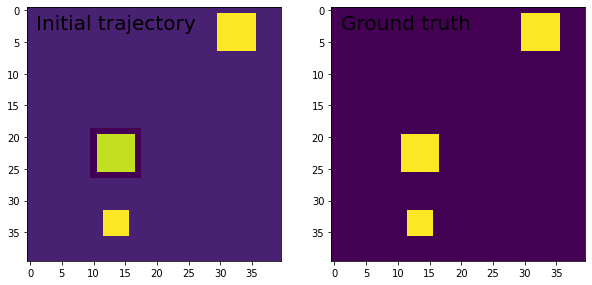

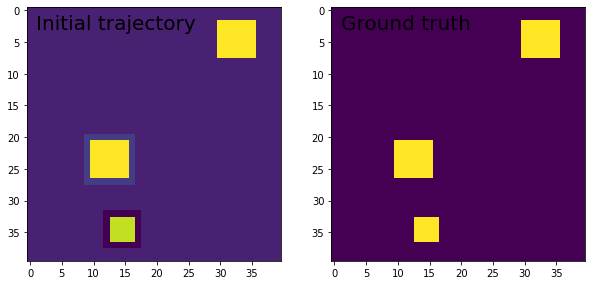

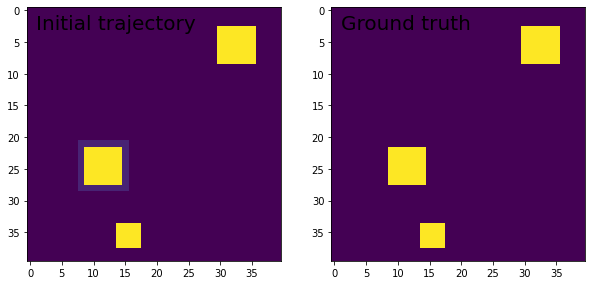

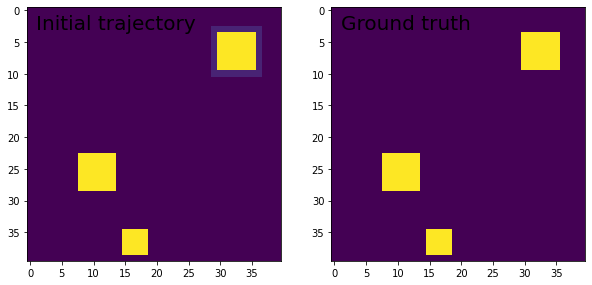

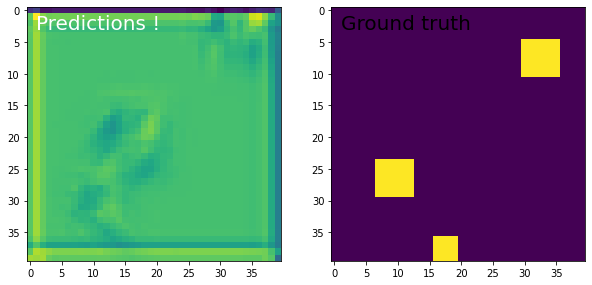

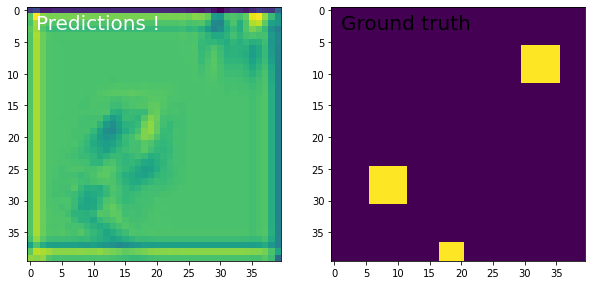

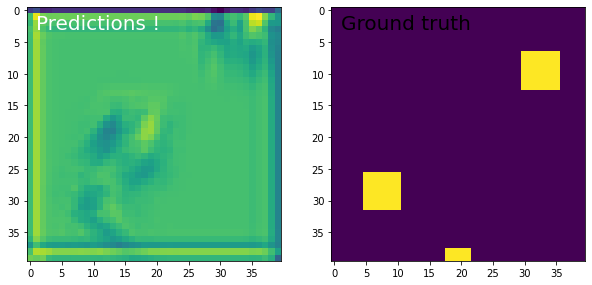

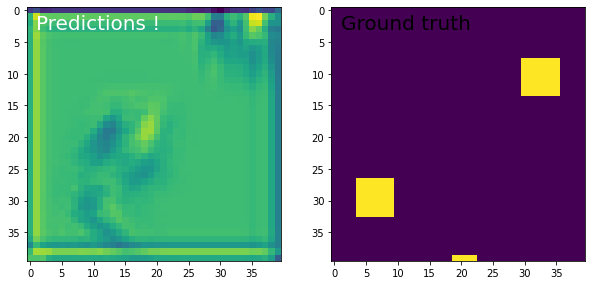

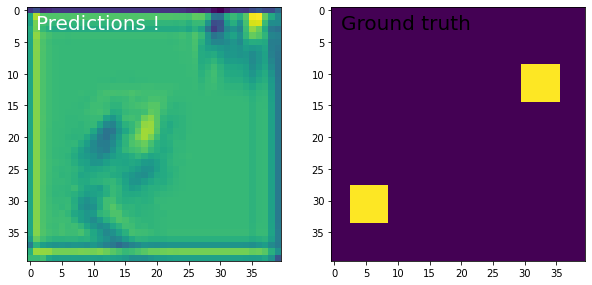

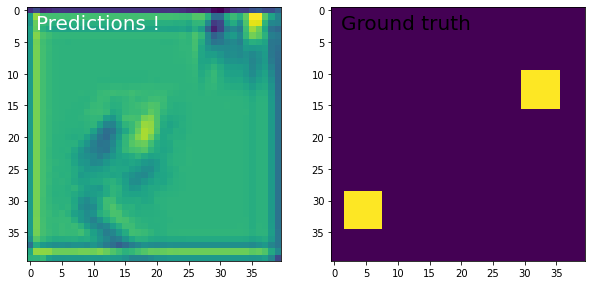

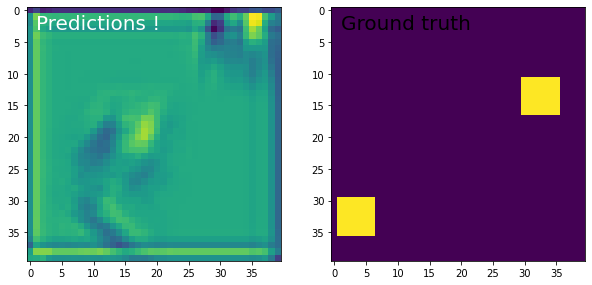

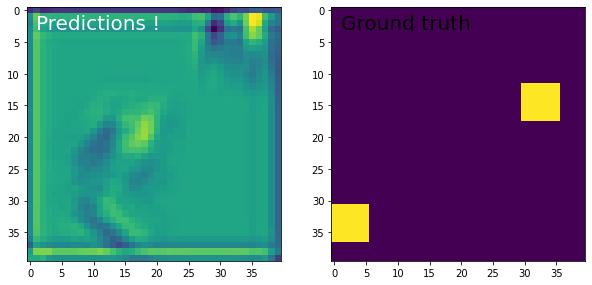

In [11]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=1, validation_split=0.05)
        #epochs=300, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題2】（アドバンス課題）複数のデータセット間での比較
>他のデータセットでも実験を行なってください。
>
>データセット - Keras Documentation
>
>Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

In [46]:
from keras.datasets import reuters
print('Loading data...')
#(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
#                                                         num_words=None,
#                                                         skip_top=0,
#                                                         maxlen=None,
#                                                         test_split=0.2,
#                                                         seed=113,
#                                                         start_char=1,
#                                                         oov_char=2,
#                                                         index_from=3)

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

Loading data...


/Users/ishiitomoaki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/ishiitomoaki/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [48]:
print(x_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [49]:

max_features = 30000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80

In [50]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)


#### LSTM

In [51]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
print('Train...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,#epochs=15,
              validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
281/281 [==============================] - 270s 858ms/step - loss: -146.2334 - accuracy: 0.0456 - val_loss: -395.7755 - val_accuracy: 0.0467
Epoch 2/5
281/281 [==============================] - 194s 688ms/step - loss: -456.9906 - accuracy: 0.0494 - val_loss: -684.0406 - val_accuracy: 0.0467
Epoch 3/5
281/281 [==============================] - 224s 798ms/step - loss: -741.4363 - accuracy: 0.0471 - val_loss: -967.5790 - val_accuracy: 0.0467
Epoch 4/5
281/281 [==============================] - 304s 1s/step - loss: -1049.1028 - accuracy: 0.0472 - val_loss: -1248.0679 - val_accuracy: 0.0467
Epoch 5/5
71/71 [==============================] - 8s 114ms/step - loss: -1528.9453 - accuracy: 0.0467
Test score: -1528.9453125
Test accuracy: 0.0467497780919075


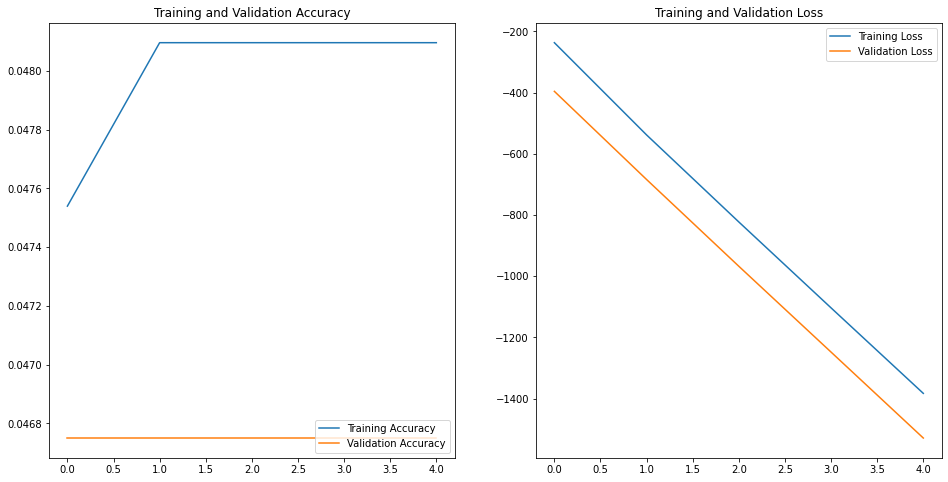

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### SimpleRNN

In [53]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# SimpleRNN　に変更
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
print('Train...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,#epochs=15,
              validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
281/281 [==============================] - 136s 399ms/step - loss: -118.5405 - accuracy: 0.0483 - val_loss: -411.7637 - val_accuracy: 0.0467
Epoch 2/5
281/281 [==============================] - 108s 383ms/step - loss: -442.6699 - accuracy: 0.0463 - val_loss: -693.5376 - val_accuracy: 0.0467
Epoch 3/5
281/281 [==============================] - 98s 347ms/step - loss: -781.1746 - accuracy: 0.0471 - val_loss: -997.0704 - val_accuracy: 0.0467
Epoch 4/5
281/281 [==============================] - 105s 373ms/step - loss: -1069.4819 - accuracy: 0.0457 - val_loss: -1289.8682 - val_accuracy: 0.0467
Epoch 5/5
71/71 [==============================] - 3s 39ms/step - loss: -1578.8456 - accuracy: 0.0467
Test score: -1578.8455810546875
Test accuracy: 0.0467497780919075


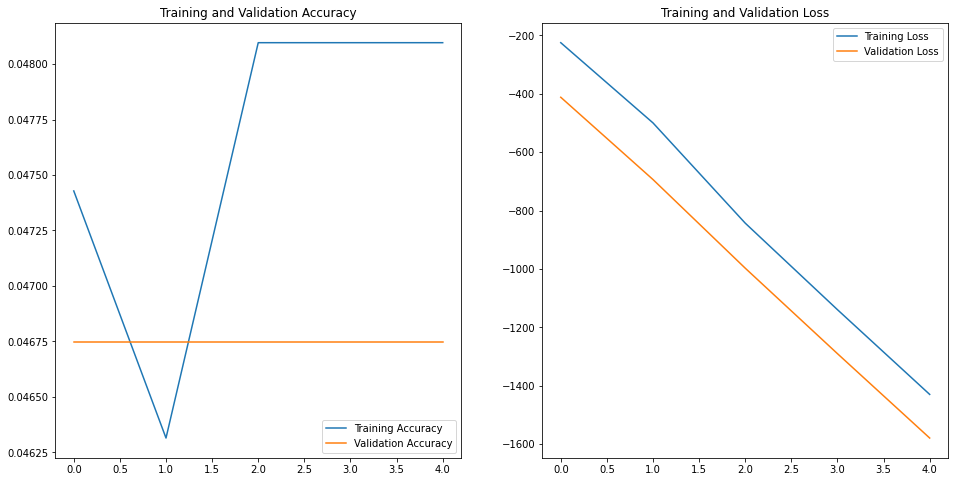

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### GRU

In [55]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
# SimpleRNN　に変更
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 5
print('Train...')
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,#epochs=15,
              validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
281/281 [==============================] - 315s 787ms/step - loss: -155.5392 - accuracy: 0.0460 - val_loss: -408.1016 - val_accuracy: 0.0467
Epoch 2/5
281/281 [==============================] - 216s 766ms/step - loss: -489.7389 - accuracy: 0.0469 - val_loss: -693.8080 - val_accuracy: 0.0467
Epoch 3/5
281/281 [==============================] - 201s 714ms/step - loss: -761.5474 - accuracy: 0.0490 - val_loss: -977.6934 - val_accuracy: 0.0467
Epoch 4/5
281/281 [==============================] - 248s 881ms/step - loss: -1048.4060 - accuracy: 0.0499 - val_loss: -1259.7975 - val_accuracy: 0.0467
Epoch 5/5
71/71 [==============================] - 7s 97ms/step - loss: -1542.3718 - accuracy: 0.0467
Test score: -1542.371826171875
Test accuracy: 0.0467497780919075


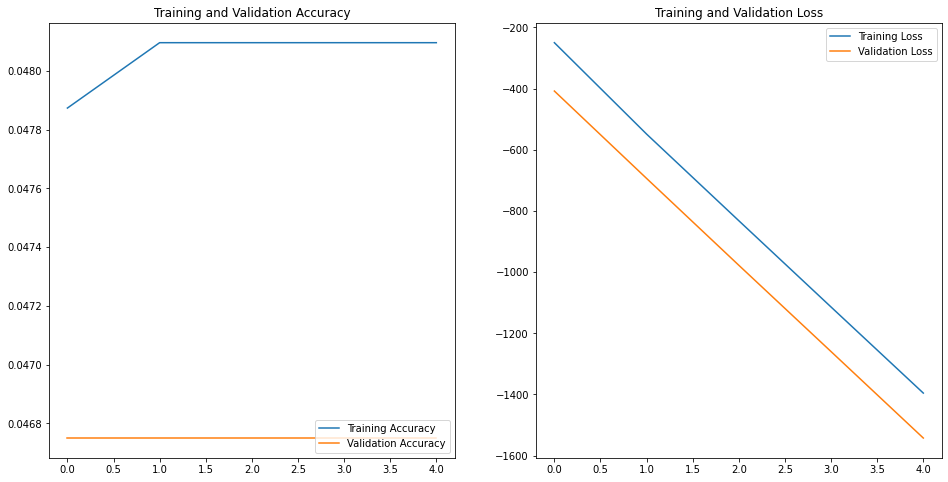

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 精度の比較

- LSTM
    - Test score: -1528.9453125
    - Test accuracy: 0.0467497780919075
    - グラフの分析：ロスは下がっているが、精度は低い状態。
- SimpleRNN
    - Test score: -1578.8455810546875
    - Test accuracy: 0.0467497780919075
    - グラフの分析：ロスは下がっているが、精度は低い状態。
- GRU
    - 
    


## 【問題3】他のクラスの説明
>ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。
>
- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

- RNN
    - Recurrentレイヤーに対する基底クラス．
        - RNN : リカレントニューラルネットワーク
- SimpleRNNCell
    - SimpleRNNのCellクラス
        - SimpleRNN : 出力が入力にフィードバックされる全結合RNN．
        - セル：セルは実際の計算コンポーネントであり、単一の入力である過去の状態を受け取り、出力である新しい状態を生成します。これらは実際には、たとえばGRUセルの計算を含むステップ関数を実行します。　　
        - RNNレイヤー：これらのレイヤーは、対応するセルをラップして、同じセルを複数のタイムステップに適用します。したがって、セルは入力シーケンスに対して繰り返され、などの追加オプションに基づいて出力を収集しますreturn_sequences。
        - RNN(LSTMCell(10)) (https://www.tensorflow.org/guide/keras/rnn)

- GRUCell
    - GRUレイヤーのためのCellクラス．
        - GRU : ゲート付き回帰型(リカレント)ユニット(2つの異なる変種があります．)
            - デフォルトは1406.1078v3を基にしたもので，行列の乗算の前に隠れ状態にリセットゲートを適用します．
            - もう1つはオリジナルである1406.1078v1をベースにしているもので，処理の順番が逆です．（GPU限定の）CuDNNGRUに互換があり，CPUでの推論も可能です．
- LSTMCell
    - LSTMレイヤーのためのcellクラス．
        - LSTM : (Long short-term memory)長短期記憶ユニット
- StackedRNNCells
    - RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．効率的なstacked RNNを実装するために使われます．
- CuDNNGRU
    - CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作します．
        - CuDNN : NVIDIA cuDNN(ディープニューラルネットワーク用のプリミティブのGPUアクセラレーションライブラリ)
- CuDNNLSTM
    - CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作します．

以上